In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
from scipy.fft import fft

In [41]:
fsamp=40000
fpass=4000
fstop=8000
fs=0.5
wp=fpass/(fsamp/2)
ws=fstop/(fsamp/2)
Td=1
gpass=0.5 #passband ripple
gstop=40 #stopband attenuation

In [42]:
omegap=(2/Td)*np.tan(wp/2)
omegas=(2/Td)*np.tan(ws/2)
N,Wn=signal.buttord(omegap,omegas,gpass,gstop,analog='True')
print("order of the filter=",N)
print("cut-off frequency=",Wn)
#Z domain conversion
#b is numerator and a is denominator
b,a=signal.butter(N,Wn,'low',True)
z,p=signal.bilinear(b,a,fs)
w,h=signal.freqz(z,p,512) #w is freq domain and h is magnitude in z domain

order of the filter= 9
cut-off frequency= 0.2255460206347474


Text(0, 0.5, 'Amplitude [dB]')

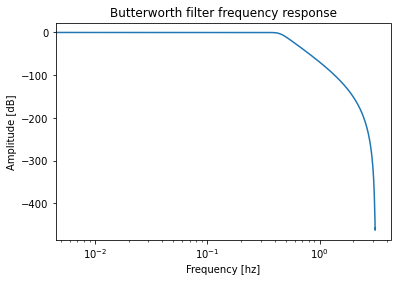

In [43]:
#magnitude response
plt.semilogx(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [hz]')
plt.ylabel('Amplitude [dB]')

Text(0, 0.5, 'Amplitude')

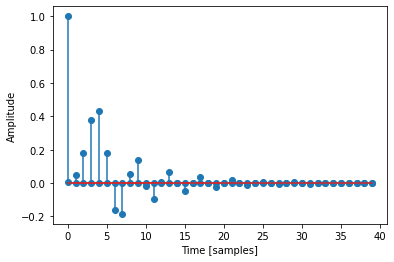

In [44]:
#impulse response
imp=signal.unit_impulse(40)
c,d=signal.butter(N,0.5)
response=signal.lfilter(c,d,imp)
plt.stem(np.arange(0,40),imp,use_line_collection=True)
plt.stem(np.arange(0,40),response,use_line_collection=True)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')

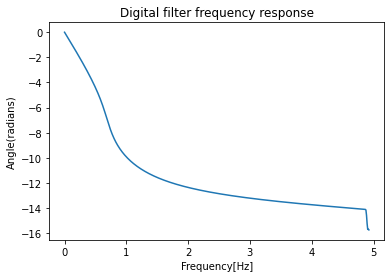

In [45]:
#phase response
fig,ax1=plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)')
ax1.set_xlabel('Frequency[Hz]')
angles=np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi,angles)